**непараметрическая регрессия**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

In [ ]:
# загружаем даные
# data = np.loadtxt('../data/1000f/points.txt')
# data = np.loadtxt('../data/1000b/points.txt')
data = np.loadtxt('../data/1000_1_sin/points.txt')

In [2]:
# print( data.shape )
# print( data.min(axis=0) )
# print( data.max(axis=0) )

In [3]:
X = data[:,0:-1] # признаки
y = data[:,-1] # ответ
X.shape,y.shape

((1000, 1), (1000,))

---

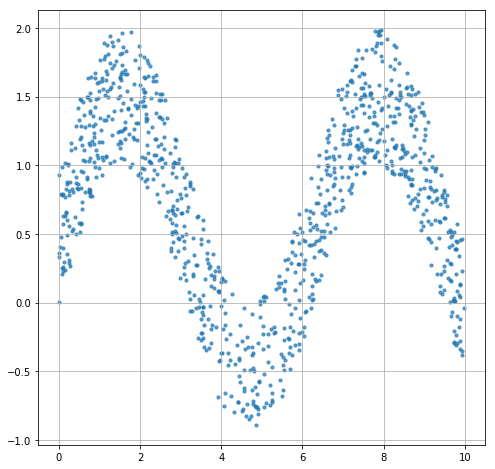

In [6]:
# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
# plt.savefig('1.png')
plt.show()


---

непараметрическая регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

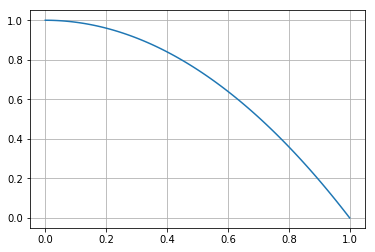

In [26]:
# # треугольное ядро
# def K(x): 
#     r=(1.0-np.abs(x))
#     r[r<0.0]=0.0
#     return r


# квадратичное ядро (Епанечникова)
def K(x): 
    r=(1.0-np.square(x))
    r[r<0.0]=0.0
    return r


# # гауссово ядро
# def K(x): 
#     r=np.exp(-2.0*np.square(x))
#     r[r<0.0]=0.0
#     return r


x = np.linspace(0.0,1.0,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

---

In [27]:
# точки, для которых будем считать регрессию
n=X.shape[0]//10 # количество
u=np.linspace(X.min(),X.max(),n).reshape(-1,1)

---

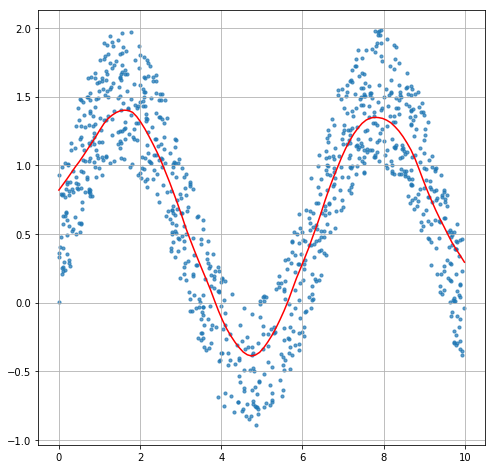

In [31]:
from sklearn.metrics import pairwise_distances

r=pairwise_distances(u,X,metric='euclidean') # 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'
r/=r.max() #нормируем матрицу расстояний

h=.1 # ширина окна, влияет на точность апроксимации
w = K(r/h)
z = (y*w).sum(axis=1)/w.sum(axis=1)

# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.plot(u,z,c='r') # точки учебного набора
plt.grid()
plt.show()

In [ ]:
# найти данные в uci
# реализовать для n-признаков

In [4]:
# data = np.random.rand(1000,2)
# print( data.shape )
# print( data.min(axis=0) )
# print( data.max(axis=0) )

# X = data[:,0:-1] *10.0 # признаки
# #y = (np.log(X) +data[:,-1].reshape(-1,1)).flatten() # ответ
# y = (np.sin(X) +data[:,-1].reshape(-1,1)).flatten() # ответ

# X.shape,y.shape

In [5]:
#  np.savetxt('1.txt', np.hstack([X,y.reshape(-1,1)]) )